In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import LinearRegressionErrors as lrs

Graficos para los tamaños de avalancha (size), columna 2 de los ficheros AdditionData

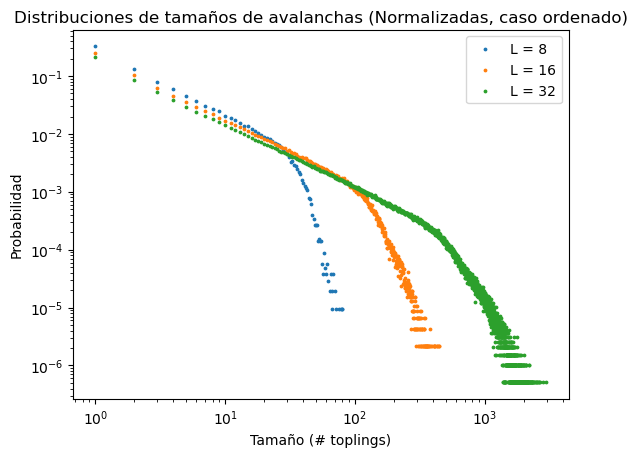

In [3]:
l = [8, 16, 32]
for k in l:
    data = np.loadtxt("Datos\sim003\AdditionData_limit8Order_statistic10000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,1],int(np.max(data[:,1])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x, y, s=3, label="L = "+str(k))

plt.yscale("log")
plt.xscale("log")
plt.title("Distribuciones de tamaños de avalanchas (Normalizadas, caso ordenado)")
plt.xlabel("Tamaño (# toplings)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

Sacamos la pendiente del modelo mas grande L = 32 (TAMAÑOS)

Pendiente: [-1.13340728] ± [0.00421478]
Ord. origen: -1.546877435917045 ± [19.5037415]
R^2: 0.9972594159626482


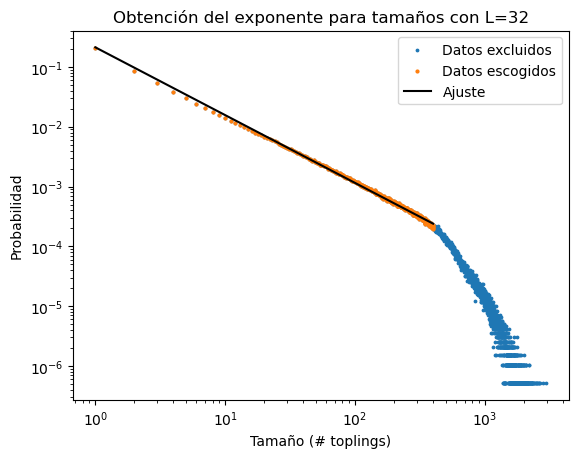

In [4]:
data = np.loadtxt("Datos\sim003\AdditionData_limit8Order_statistic10000_32x32.dat", delimiter=",", dtype=int)
data = data[ data[:,1]>0]
y = np.histogram(data[:,1],int(np.max(data[:,1])), density=True)[0]
x = np.linspace(1, y.size, y.size)
plt.scatter(x, y, s=3, label="Datos excluidos")

linRegData = y[0:400]
linRegX = x[0:400]
plt.scatter(linRegX,linRegData, s=4, label="Datos escogidos")

regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

m = regModel.coef_
n = regModel.intercept_
R2 = regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", m, "±" , lrs.mErr(m, R2, linRegX.size))
print("Ord. origen:", n, "±", lrs.nErr(m, R2, linRegX.size, linRegX))
print("R^2:", R2)

plt.plot(linRegX, np.exp(regModel.intercept_)*linRegX**regModel.coef_,color="black", label="Ajuste")

plt.yscale("log")
plt.xscale("log")
plt.title("Obtención del exponente para tamaños con L=32")
plt.xlabel("Tamaño (# toplings)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

Exponente D tamaños

Pendiente: [2.32192809] ± [0.]
Ord. origen: -0.4462871026284203 ± [0.]
R^2: 1.0


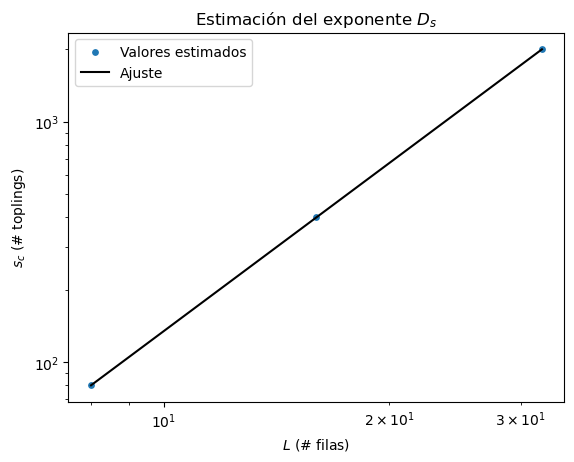

In [5]:
l = [8, 16, 32]
Xc = [80, 400, 2000]

plt.scatter(l, Xc, s=15, label="Valores estimados")

linRegData = np.array(Xc)
linRegX = np.array(l)

regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

m = regModel.coef_
n = regModel.intercept_
R2 = regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", m, "±" , lrs.mErr(m, R2, linRegX.size))
print("Ord. origen:", n, "±", lrs.nErr(m, R2, linRegX.size, linRegX))
print("R^2:", R2)

plt.plot(linRegX, np.exp(regModel.intercept_)*linRegX**regModel.coef_,color="black", label="Ajuste")

plt.yscale("log")
plt.xscale("log")
plt.title("Estimación del exponente $D_s$")
plt.xlabel("$L$ (# filas)")
plt.ylabel("$s_c$ (# toplings)")
plt.legend()
plt.show()

Colapso tamaños

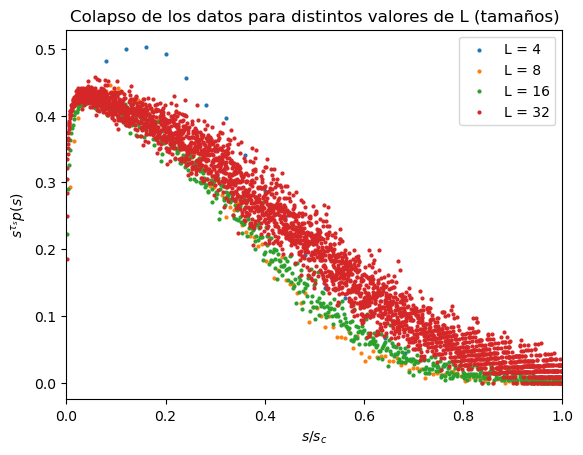

In [6]:
tau = 1.333 #1.366
D = 2.32 #2.32

l = [4, 8, 16, 32]
for k in l:
    data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,1],int(np.max(data[:,1])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x/(k**D), y*x**tau, s=4, label="L = "+str(k))

#plt.yscale("log")
#plt.xscale("log")
plt.title("Colapso de los datos para distintos valores de L (tamaños)")
plt.xlabel(r"$s / s_c$")
plt.ylabel(r"$s^{\tau_s}p(s)$")
plt.legend()
plt.xlim(0,1)
plt.show()

Graficos para las duraciones de avalancha, columna 3 de los ficheros AdditionData

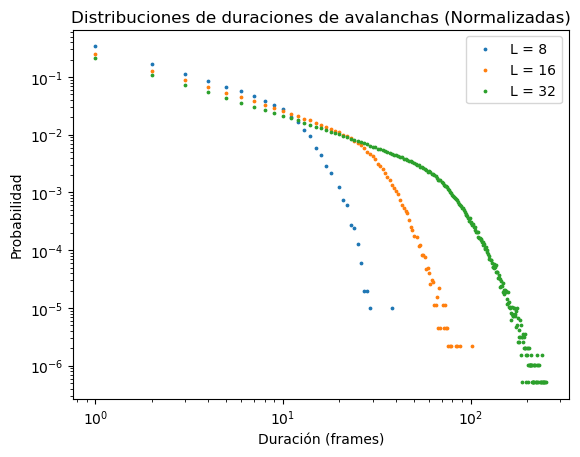

In [7]:
l = [8, 16, 32]
for k in l:
    data = np.loadtxt("Datos\sim003\AdditionData_limit8Order_statistic10000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,2],int(np.max(data[:,2])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x, y, s=3, label="L = "+str(k))

plt.yscale("log")
plt.xscale("log")
plt.title("Distribuciones de duraciones de avalanchas (Normalizadas)")
plt.xlabel("Duración (frames)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

Sacamos la pendiente del modelo mas grande L = 32 (DURACIONES)

Pendiente: [-1.08866118] ± [0.01148592]
Ord. origen: -1.3863174551929474 ± [2.37969269]
R^2: 0.9973391454672331


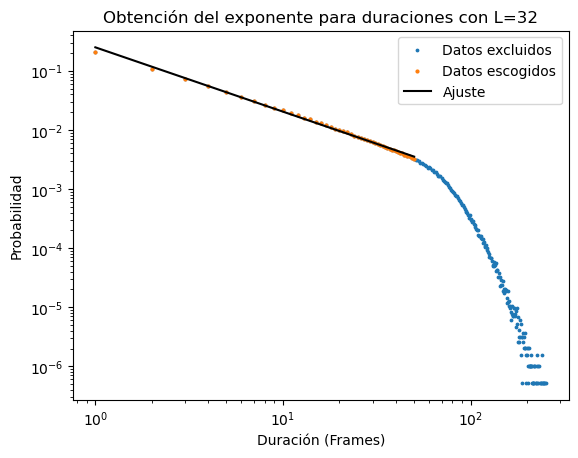

In [8]:
data = np.loadtxt("Datos\sim003\AdditionData_limit8Order_statistic10000_32x32.dat", delimiter=",", dtype=int)
data = data[ data[:,1]>0]
y = np.histogram(data[:,2],int(np.max(data[:,2])), density=True)[0]
x = np.linspace(1, y.size, y.size)
plt.scatter(x, y, s=3, label="Datos excluidos")

linRegData = y[0:50]
linRegX = x[0:50]
plt.scatter(linRegX,linRegData, s=4, label="Datos escogidos")

regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

m = regModel.coef_
n = regModel.intercept_
R2 = regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", m, "±" , lrs.mErr(m, R2, linRegX.size))
print("Ord. origen:", n, "±", lrs.nErr(m, R2, linRegX.size, linRegX))
print("R^2:", R2)

plt.plot(linRegX, np.exp(regModel.intercept_)*linRegX**regModel.coef_,color="black", label="Ajuste")

plt.yscale("log")
plt.xscale("log")
plt.title("Obtención del exponente para duraciones con L=32")
plt.xlabel("Duración (Frames)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()